# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [105]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [127]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df['date'] = pyber_data_df['date'].astype('datetime64[ns]')
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers_numbers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_numbers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_amount_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_amount_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fares_per_ride = total_amount_fares / total_rides_count
average_fares_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fares_per_driver = total_amount_fares / total_drivers_numbers
average_fares_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [19]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides":total_rides_count,"Total Drivers":total_drivers_numbers,"Total Fares":total_amount_fares,"Average Fare Per Ride":average_fares_per_ride,"Average Fare Per Driver":average_fares_per_driver})
pyber_summary_df.dtypes


Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare Per Ride      float64
Average Fare Per Driver    float64
dtype: object

In [20]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [21]:
#  8. Format the columns.
import numpy as np
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:.2f}".format) 

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [128]:
# 1. Read the merged DataFrame
new_merged_df = pyber_data_df
new_merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3908451377344,46,Urban


In [130]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_df = new_merged_df.groupby(["type","date"]).sum()[["fare"]]
sum_fares_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:00  43.69
      2019-01-02 11:18:00  52.12
      2019-01-03 19:51:00  19.90
      2019-01-04 03:31:00  24.88
      2019-01-06 07:38:00  47.33

In [131]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_fares_df = sum_fares_df.reset_index()
sum_fares_df


,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33
...,...,...,...
2359,Urban,2019-05-08 04:20:00,21.99
2360,Urban,2019-05-08 04:39:00,18.45
2361,Urban,2019-05-08 07:29:00,18.55
2362,Urban,2019-05-08 11:38:00,19.77


In [132]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_fares_pivot_df = sum_fares_df.pivot(index ="date", columns="type", values="fare")
sum_fares_pivot_df.tail()

type,Rural,Suburban,Urban
date,,,
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55
2019-05-08 11:38:00,NaN,NaN,19.77
2019-05-08 13:10:00,NaN,NaN,18.04


In [133]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_fares_pivot_df = sum_fares_pivot_df.loc['2019-01-01':'2019-04-28']
new_fares_pivot_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [134]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_fares_pivot_df.index = pd.to_datetime(new_fares_pivot_df.index)

In [135]:
# 7. Check that the datatype for the index is datetime using df.info()
new_fares_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [136]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_new_fares_pivot_df=new_fares_pivot_df.resample("W").sum()
weekly_new_fares_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


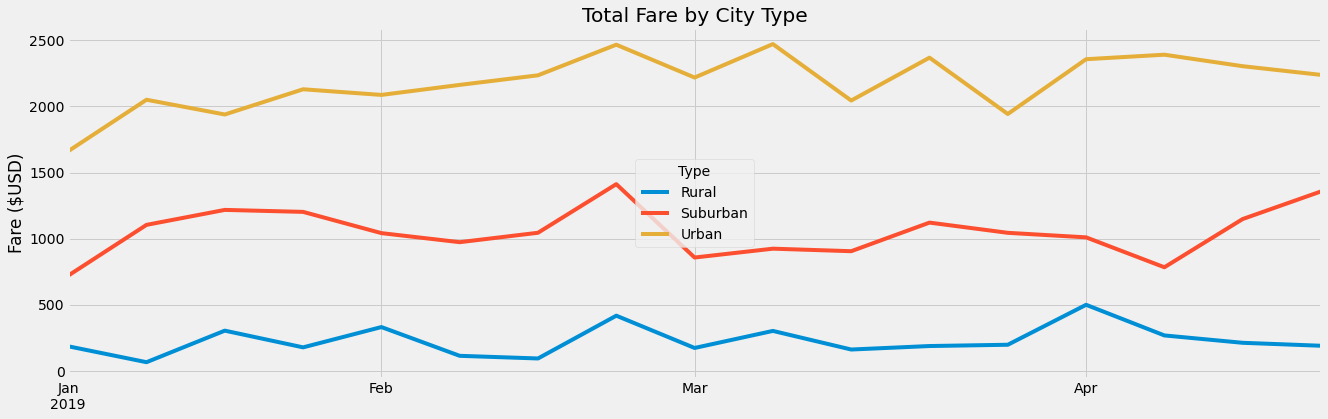

In [137]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax= weekly_new_fares_pivot_df.plot(figsize=(20,6))

#Formatting
ax.set_title ("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("")
ax.legend(title= "Type", loc="center")

plt.show

#save fig
plt.savefig("analysis/PyBer_fare_summary.png")